In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from keras.layers import Dense, BatchNormalization,Dropout,LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score,f1_score


In [10]:
data = pd.read_csv('/kaggle/input/heart-failure-clinical-records-dataset/Heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

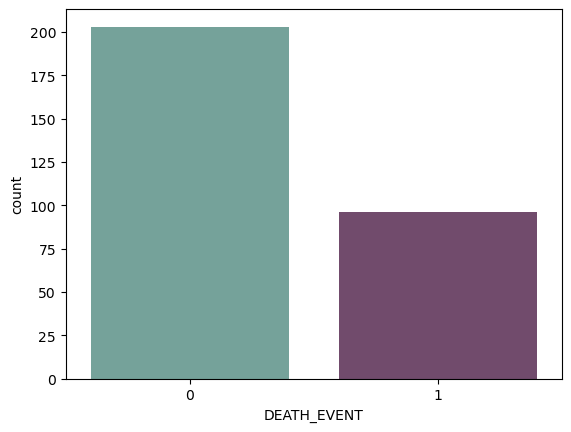

In [12]:
#Checking imbalance in data

cols = ['#6daa9f','#774571']
sns.countplot(x=data["DEATH_EVENT"],palette=cols)

In [13]:
X = data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [14]:
#Scaling
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()

X_df =s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns = col_names)
X_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,3.921055e-16,1.009969e-16,0.000000,9.060014e-17,-3.267546e-17,0.000000,7.723291e-17,1.425838e-16,-8.673849e-16,-8.911489e-18,-1.188199e-17,-1.901118e-16
std,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.753828e+00,-8.711048e-01,-0.576918,-8.475794e-01,-2.038387e+00,-0.735688,-2.440155e+00,-8.655094e-01,-5.363206e+00,-1.359272e+00,-6.876819e-01,-1.629502e+00
25%,-8.279805e-01,-8.711048e-01,-0.480393,-8.475794e-01,-6.841802e-01,-0.735688,-5.208700e-01,-4.782047e-01,-5.959961e-01,-1.359272e+00,-6.876819e-01,-7.389995e-01
50%,-7.046859e-02,-8.711048e-01,-0.342574,-8.475794e-01,-7.076750e-03,-0.735688,-1.390846e-02,-2.845524e-01,8.503384e-02,7.356882e-01,-6.876819e-01,-1.969543e-01
75%,7.712113e-01,1.147968e+00,0.000166,1.179830e+00,5.853888e-01,1.359272,4.111199e-01,5.926150e-03,7.660638e-01,7.356882e-01,1.454161e+00,9.387595e-01
max,2.875411e+00,1.147968e+00,7.514640,1.179830e+00,3.547716e+00,1.359272,6.008180e+00,7.752020e+00,2.582144e+00,7.356882e-01,1.454161e+00,1.997038e+00


In [15]:
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=15)



In [34]:
X_train.shape
X_test.shape

(75, 12)

In [17]:
early_stopping = callbacks.EarlyStopping(
  min_delta =0.001, #minimum amount of change considered as improvement,
  patience = 25, #epochs to wait before stopping
  restore_best_weights = True) 

model = Sequential()

model.add(Dense(units=16, kernel_initializer = 'uniform',activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer = 'uniform', activation='relu')),
model.add(Dropout(0.25)),
model.add(Dense(units =1 , kernel_initializer='uniform',activation='sigmoid'))

from tensorflow.keras.optimizers import SGD
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train, batch_size=32, epochs=500, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 1s 55ms/step - loss: 0.6927 - accuracy: 0.6536 - val_loss: 0.6917 - val_accuracy: 0.7111
Epoch 2/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6915 - accuracy: 0.6648 - val_loss: 0.6900 - val_accuracy: 0.7111
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6901 - accuracy: 0.6648 - val_loss: 0.6883 - val_accuracy: 0.7111
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6888 - accuracy: 0.6648 - val_loss: 0.6863 - val_accuracy: 0.7111
Epoch 5/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6868 - accuracy: 0.6648 - val_loss: 0.6841 - val_accuracy: 0.7111
Epoch 6/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6852 - accuracy: 0.6648 - val_loss: 0.6813 - val_accuracy: 0.7111
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6827 - accuracy: 0.6648 - val_loss: 0.6782 - val_accuracy: 0.7111
Epoch 8/500
6/6 [=========

In [19]:
val_accuracy = np.mean(history.history['val_accuracy']) *100
print('val_accuracy:',val_accuracy)

val_accuracy: 78.46153974533081


In [28]:
#Prediction
y_pred = model.predict(X_test)
y_pred1 = []
for element in y_pred:
    if (element > 0.5):
        y_pred1.append(1)
    else:
        y_pred1.append(0)
y_pred1[:10]

3/3 [==============================] - 0s 3ms/step


[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]

In [29]:
y_test[:10]
#fourth is a wrong pred

201    0
291    0
91     0
137    0
152    0
122    0
178    0
148    1
79     0
280    0
Name: DEATH_EVENT, dtype: int64

Text(95.72222222222221, 0.5, 'Truth')

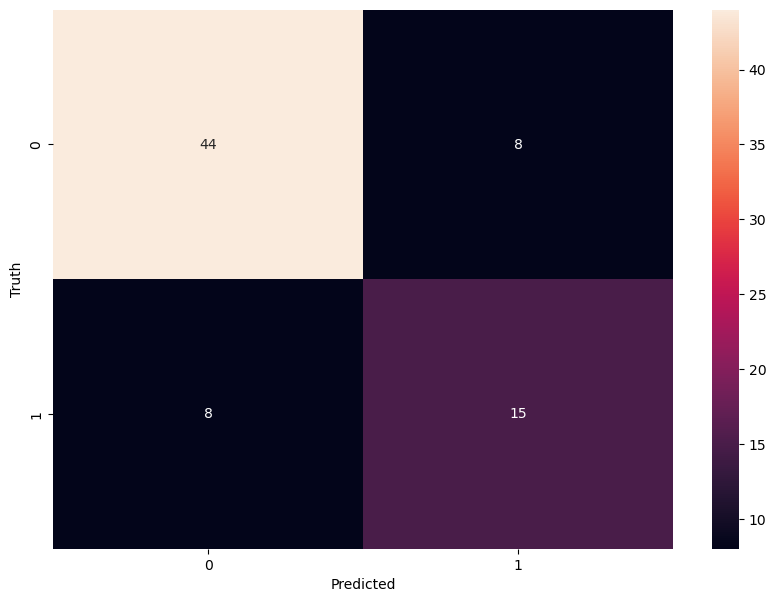

In [30]:
#heatmap confusion_matrix
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred1)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')


#diagonal values is correct prediction ->885 and 223

In [31]:
#Accuracy
(885+223)/(885+223+114+185)

0.7874911158493249

In [32]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        52
           1       0.65      0.65      0.65        23

    accuracy                           0.79        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.79      0.79      0.79        75

